In [2]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score
from matplotlib import pyplot as plt
import sys
sys.path.insert(0, '/mnt/lareaulab/cfbuenabadn/sc_splicing_regulation/utils/')
from utils_functions import *
from statsmodels.stats.multitest import multipletests


In [3]:
weyn_pvals = pd.read_csv('~/sc_splicing_regulation/timeseries_neurogenesis/Weyn_pvals.tab', sep='\t', index_col=0)
weyn_fdr = pd.read_csv('~/sc_splicing_regulation/timeseries_neurogenesis/Weyn_fdr.tab', sep='\t', index_col=0)
weyn_psi = pd.read_csv('~/sc_splicing_regulation/timeseries_neurogenesis/Weyn_psi.tab', sep='\t', index_col=0)

weyn_ds = get_averages_bulk(weyn_psi)


In [4]:
tiklova_PSI = pd.read_csv('mouse_brain_development/data/preprocess/tables/psi.tab.gz', sep='\t', index_col=0)
tiklova_meta = pd.read_csv('mouse_brain_development/data/SraRunTable.txt.gz', sep=',', index_col=0)
tiklova_psix = pd.read_csv('mouse_brain_development/psix_3D/psix_results.tab.gz', sep='\t', index_col=0)

In [5]:
e13 = tiklova_meta.index[tiklova_meta.Age == 'embryonic day 13.5'] & tiklova_PSI.columns
e15 = tiklova_meta.index[tiklova_meta.Age == 'embryonic day 15.5'] & tiklova_PSI.columns
e18 = tiklova_meta.index[tiklova_meta.Age == 'embryonic day 18.5'] & tiklova_PSI.columns
p1 = tiklova_meta.index[tiklova_meta.Age == 'postnatal day 1'] & tiklova_PSI.columns
p7 = tiklova_meta.index[tiklova_meta.Age == 'postnatal day 7'] & tiklova_PSI.columns
p90 = tiklova_meta.index[tiklova_meta.Age == 'postnatal day 90'] & tiklova_PSI.columns

tiklova_labels = [e13, e15, e18, p1, p7, p90]
from scipy.stats import kruskal

def run_kw(exon_psi, labels):
    kw_input = []
    for l in labels:
        kw_input.append(list(exon_psi.loc[l]))
        
    if len(labels) == 2:
        return kruskal(kw_input[0], kw_input[1], nan_policy='omit')
    if len(labels) == 3:
        return kruskal(kw_input[0], kw_input[1], kw_input[2], nan_policy='omit')
    if len(labels) == 4:
        return kruskal(kw_input[0], kw_input[1], kw_input[2], kw_input[3], nan_policy='omit')
    if len(labels) == 5:
        return kruskal(kw_input[0], kw_input[1], kw_input[2], kw_input[3], kw_input[4], nan_policy='omit')
    if len(labels) == 6:
        return kruskal(kw_input[0], kw_input[1], kw_input[2], kw_input[3], kw_input[4], kw_input[5], nan_policy='omit')
    
def run_kw_dset(psi_table, labels, exon_list):
    kw_output = pd.DataFrame()
    kw_score = []
    pvals = []
    for exon in exon_list:
        score, p = run_kw(psi_table.loc[exon], labels)
        kw_score.append(score)
        pvals.append(p)
    kw_output['KW_score'] = kw_score
    kw_output['pvals'] = pvals
    kw_output['qvals'] = multipletests(pvals, method='fdr_bh')[1]
    kw_output.index = exon_list
    return kw_output

tiklova_kw = run_kw_dset(tiklova_PSI, tiklova_labels, tiklova_psix.index)

In [6]:
tiklova_gearyc = pd.read_csv('mouse_brain_development/geary_c/GearyC_k100.tab', sep='\t', index_col=0)

In [7]:

tiklova_gearyc['qvals'] = multipletests(tiklova_gearyc.pvals, method='fdr_bh')[1]

In [8]:
one_v_one = 'mouse_brain_development/brie2/'
tiklova_0v1 = pd.read_csv(one_v_one + 'brie_output_E13_v_E15/brie_quant_cell.brie_ident.tsv', sep='\t', index_col=0)
tiklova_0v2 = pd.read_csv(one_v_one + 'brie_output_E13_v_E18/brie_quant_cell.brie_ident.tsv', sep='\t', index_col=0)
tiklova_0v3 = pd.read_csv(one_v_one + 'brie_output_E13_v_P1/brie_quant_cell.brie_ident.tsv', sep='\t', index_col=0)
tiklova_0v4 = pd.read_csv(one_v_one + 'brie_output_E13_v_P7/brie_quant_cell.brie_ident.tsv', sep='\t', index_col=0)
tiklova_0v5 = pd.read_csv(one_v_one + 'brie_output_E13_v_P90/brie_quant_cell.brie_ident.tsv', sep='\t', index_col=0)

tiklova_one_v_one = pd.DataFrame()
tiklova_one_v_one['0v1'] = tiklova_0v1.neuro_FDR
tiklova_one_v_one['0v2'] = tiklova_0v2.neuro_FDR
tiklova_one_v_one['0v3'] = tiklova_0v3.neuro_FDR
tiklova_one_v_one['0v4'] = tiklova_0v4.neuro_FDR
tiklova_one_v_one['0v5'] = tiklova_0v5.neuro_FDR
tiklova_ovo = tiklova_one_v_one.min(axis=1)

# tiklova_one_v_one = pd.DataFrame()
# tiklova_one_v_one['0v1'] = tiklova_0v1.neuro_pval
# tiklova_one_v_one['0v2'] = tiklova_0v2.neuro_pval
# tiklova_one_v_one['0v3'] = tiklova_0v3.neuro_pval
# tiklova_one_v_one['0v4'] = tiklova_0v4.neuro_pval
# tiklova_one_v_one['0v5'] = tiklova_0v5.neuro_pval
# tiklova_ovo = tiklova_one_v_one.min(axis=1)

In [39]:
psix_random = pd.read_csv('~/brie_runs/psix_random.tab', sep='\t', index_col=0)
kw_random = pd.read_csv('~/brie_runs/kw_random.tab', sep='\t', index_col=0)
brie2_random = pd.read_csv('~/brie_runs/brie2_random.tab', sep='\t', index_col=0)


In [9]:
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

weyn_pos = weyn_fdr.index[(weyn_ds.max(axis=1) >= 0.2) & (weyn_fdr.min(axis=1) <= 0.05)]

exons = tiklova_psix.index & tiklova_ovo.index
exons_pos = weyn_pos & exons


In [10]:
pre, rec, t = precision_recall_curve([1]*len(exons_pos) + [0]*len(psix_random), 
         list(tiklova_psix.loc[exons_pos].psix_score) + list(psix_random.psix_score))
auc(rec, pre)

NameError: name 'psix_random' is not defined

In [46]:
pre, rec, t = precision_recall_curve([1]*len(exons_pos) + [0]*len(brie2_random), 
         list(tiklova_ovo.loc[exons_pos]) + list(brie2_random.max(axis=1)))
auc(rec, pre)

0.8705770169508966

In [37]:
precision_score([1]*len(exons_pos) + [0]*len(brie2_random), 
         list(tiklova_ovo.loc[exons_pos] <= 0.05) + list(brie2_random.min(axis=1) <= 0.05))

0.9865546218487395

In [17]:
tiklova_ovo

GeneID
Aamdc_9          1.134000e-01
Aamdc_10         4.164000e-01
Aasdhppt_2       1.666000e-04
Abat_3           1.153000e-08
Abca3_4          1.491000e-01
                     ...     
Zscan18_1        1.054000e-01
Zyx_1            2.161000e-01
l7Rn6_1          9.663000e-09
l7Rn6_3          5.484000e-04
l7Rn6_nmdSE_1    4.129000e-02
Length: 2047, dtype: float64

In [1]:
weyn_fdr.mean(axis=1)

NameError: name 'weyn_fdr' is not defined

In [73]:
from sklearn.metrics import auc
from sklearn.metrics import f1_score

weyn_pos = weyn_fdr.index[(weyn_ds.max(axis=1) >= 0.2) & (weyn_fdr.min(axis=1) <= 0.01)]
weyn_neg = weyn_fdr.index[(weyn_ds.max(axis=1) < 0.2) | (weyn_fdr.min(axis=1) > 0.01)]

exons = tiklova_psix.index
exons_pos = weyn_pos & exons
exons_neg = weyn_neg & exons


kw_auc = []
psix_auc = []
gearyc_auc = []
briep_auc = []
brie_l_auc = []

for sample in tqdm(range(200)):
    pos_choice = np.random.choice(exons_pos, np.int(0.5*len(exons_pos)), replace=False)
    neg_choice = np.random.choice(exons_neg, np.int(0.5*len(exons_neg)), replace=False)
    
    y = [1]*len(pd.Index(pos_choice) & tiklova_gearyc.index) + [0]*len(pd.Index(neg_choice) & tiklova_gearyc.index)
    c_y = list((tiklova_gearyc.loc[pd.Index(pos_choice) & tiklova_gearyc.index].qvals <= 0.05).astype(int)) + list((tiklova_gearyc.loc[pd.Index(neg_choice) & tiklova_gearyc.index].qvals <= 0.05).astype(int))
    f1 = f1_score(y, c_y)
    gearyc_auc.append(f1)

    y = [1]*len(pos_choice) + [0]*len(neg_choice)
    psix_y = list((tiklova_psix.loc[pos_choice].qvals <= 0.05).astype(int)) + list((tiklova_psix.loc[neg_choice].qvals <= 0.05).astype(int))
    psix_auc.append(f1_score(y, psix_y))
    

    kw_y = list((tiklova_kw.loc[pos_choice].qvals <= 0.05).astype(int)) + list((tiklova_kw.loc[neg_choice].qvals <= 0.05).astype(int))
    kw_auc.append(f1_score(y, kw_y))
    

    r_y = list((tiklova_ovo.loc[[x for x in pos_choice if x in tiklova_ovo.index]]<=0.05).astype(int)) + list((tiklova_ovo.loc[[x for x in neg_choice if x in tiklova_ovo.index]]<=0.05).astype(int))
    brie_l_auc.append(f1_score([1]*len([x for x in pos_choice if x in tiklova_ovo.index]) + [0]*len([x for x in neg_choice if x in tiklova_ovo.index]), r_y))
    #####




100%|██████████| 200/200 [00:04<00:00, 40.74it/s]


Text(0.5, 1.0, 'Method comparison, Tiklova dataset')

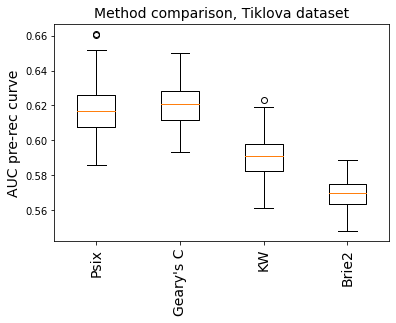

In [74]:
tiklova_boxplots = [ psix_auc, gearyc_auc, kw_auc, brie_l_auc]

# kw_auc = []
# psix_auc = []
# gearyc_auc = []
# briep_auc = []
# brie_l_auc = []

bp = plt.boxplot(tiklova_boxplots)


plt.xticks(np.arange(1, 5), 
           ['Psix', "Geary's C", 'KW', 'Brie2'], fontsize=14, rotation=90)

plt.ylabel('AUC pre-rec curve', fontsize=14)
# plt.xlabel('Method', fontsize=14)
plt.title('Method comparison, Tiklova dataset', fontsize=14)

In [12]:
one_v_one = 'mouse_brain_development/brie2/'
tiklova_0v1 = pd.read_csv(one_v_one + 'brie_output_E13_v_E15/brie_quant_cell.brie_ident.tsv', sep='\t', index_col=0)
tiklova_0v2 = pd.read_csv(one_v_one + 'brie_output_E13_v_E18/brie_quant_cell.brie_ident.tsv', sep='\t', index_col=0)
tiklova_0v3 = pd.read_csv(one_v_one + 'brie_output_E13_v_P1/brie_quant_cell.brie_ident.tsv', sep='\t', index_col=0)
tiklova_0v4 = pd.read_csv(one_v_one + 'brie_output_E13_v_P7/brie_quant_cell.brie_ident.tsv', sep='\t', index_col=0)
tiklova_0v5 = pd.read_csv(one_v_one + 'brie_output_E13_v_P90/brie_quant_cell.brie_ident.tsv', sep='\t', index_col=0)

tiklova_one_v_one = pd.DataFrame()
tiklova_one_v_one['0v1'] = tiklova_0v1.neuro_pval
tiklova_one_v_one['0v2'] = tiklova_0v2.neuro_pval
tiklova_one_v_one['0v3'] = tiklova_0v3.neuro_pval
tiklova_one_v_one['0v4'] = tiklova_0v4.neuro_pval
tiklova_one_v_one['0v5'] = tiklova_0v5.neuro_pval
tiklova_ovo = tiklova_one_v_one.min(axis=1)

In [39]:
neg = weyn_fdr.index[(weyn_ds.max(axis=1) < 0.01) | (weyn_fdr.min(axis=1) > 0.1)] & tiklova_psix.index & tiklova_ovo.index


(array([125.,  33.,  26.,  29.,  29.,  27.,  19.,  27.,  23.,  24.]),
 array([4.99750125e-04, 1.00449775e-01, 2.00399800e-01, 3.00349825e-01,
        4.00299850e-01, 5.00249875e-01, 6.00199900e-01, 7.00149925e-01,
        8.00099950e-01, 9.00049975e-01, 1.00000000e+00]),
 <a list of 10 Patch objects>)

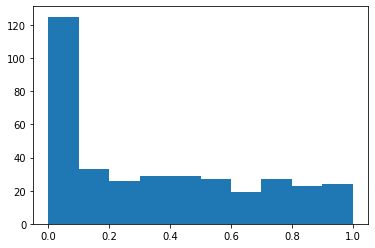

In [38]:
plt.hist(tiklova_psix.loc[weyn_neg].pvals)

(array([225.,  40.,  30.,  20.,  14.,  13.,   8.,   5.,   4.,   3.]),
 array([7.994e-32, 3.580e-02, 7.160e-02, 1.074e-01, 1.432e-01, 1.790e-01,
        2.148e-01, 2.506e-01, 2.864e-01, 3.222e-01, 3.580e-01]),
 <a list of 10 Patch objects>)

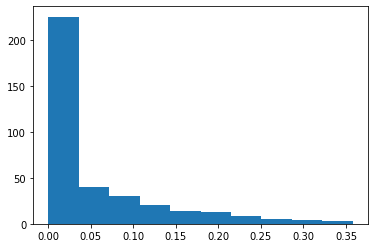

In [33]:
plt.hist(tiklova_ovo.loc[weyn_neg])

(array([193.,  36.,  25.,  16.,  25.,  17.,  17.,  15.,   8.,  10.]),
 array([7.39830480e-30, 9.84774149e-02, 1.96954830e-01, 2.95432245e-01,
        3.93909660e-01, 4.92387075e-01, 5.90864490e-01, 6.89341905e-01,
        7.87819320e-01, 8.86296734e-01, 9.84774149e-01]),
 <a list of 10 Patch objects>)

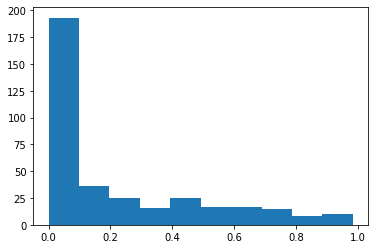

In [34]:
plt.hist(tiklova_kw.loc[weyn_neg].pvals)

(-0.5, 10.0)

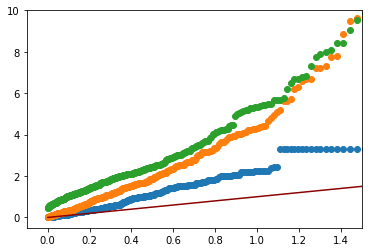

In [47]:
plt.scatter(sorted(-np.log10(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg)))),
            sorted(-np.log10(tiklova_psix.loc[weyn_neg].pvals)))

plt.scatter(sorted(-np.log10(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg)))),
            sorted(-np.log10(tiklova_kw.loc[weyn_neg].pvals)))

plt.scatter(sorted(-np.log10(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg)))),
            sorted(-np.log10(tiklova_ovo.loc[weyn_neg])))




plt.plot(sorted(-np.log10(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg)))),
            sorted(-np.log10(np.arange(0+(1/len(neg)), 1+(1/len(neg)), step = 1/len(neg)))), c='darkred')

plt.xlim((-0.1, 1.5))
plt.ylim((-0.5, 10))

In [30]:
common_idx = tiklova_psix.index & tiklova_ovo.index & weyn_pos
tiklova_psix.loc[common_idx].loc[(tiklova_psix.loc[common_idx].qvals >= 0.1) & (tiklova_ovo.loc[common_idx]<=0.01)]

,psix_score,pvals,qvals
Hmgn3_3,0.021581,0.097951,0.181872
Deaf1_nmdSE_3,0.013916,0.055472,0.116236
Scnm1_1,0.013813,0.055472,0.116236
Gabpb1_4,0.013563,0.060970,0.125859
Rnf146_4,0.012885,0.062469,0.127691
...,...,...,...
Fam118b_2,-0.028730,0.814093,0.889070
Repin1_1,-0.029305,0.834583,0.902941
N6amt1_1,-0.033029,0.837081,0.905176
Flot2_1,-0.041104,0.915042,0.952036


In [23]:
rd = pd.read_csv('mouse_brain_development/data/preprocess/tables/pc3_rd.tab.gz', sep='\t', index_col=0)

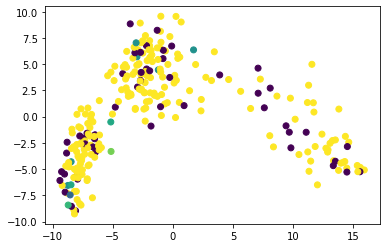

In [33]:
plt.scatter(rd.PC_1, rd.PC_2, c=tiklova_PSI.loc['Pbrm1_17'])

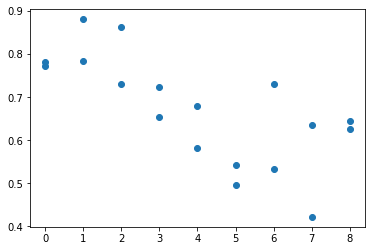

In [34]:
plt.scatter([0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8], 
            weyn_psi.loc['Pbrm1_17'])

In [49]:
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

In [50]:
tiklova_one_v_one = pd.DataFrame()
tiklova_one_v_one['0v1'] = tiklova_0v1.neuro_ELBO_gain
tiklova_one_v_one['0v2'] = tiklova_0v2.neuro_ELBO_gain
tiklova_one_v_one['0v3'] = tiklova_0v3.neuro_ELBO_gain
tiklova_one_v_one['0v4'] = tiklova_0v4.neuro_ELBO_gain
tiklova_one_v_one['0v5'] = tiklova_0v5.neuro_ELBO_gain
tiklova_ovo = tiklova_one_v_one.max(axis=1)

100%|██████████| 500/500 [00:08<00:00, 57.99it/s]


Text(0.5, 1.0, 'Method comparison, Tiklova dataset')

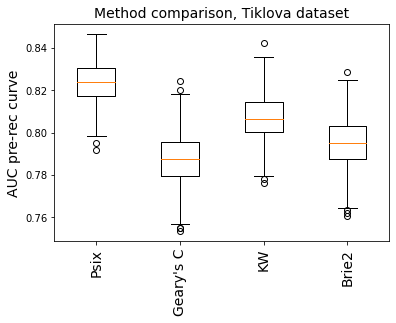

In [65]:


weyn_pos = weyn_fdr.index[(weyn_ds.max(axis=1) >= 0.2) & (weyn_fdr.min(axis=1) <= 0.01)]
weyn_neg = weyn_fdr.index[(weyn_ds.max(axis=1) < 0.01) | (weyn_fdr.min(axis=1) > 0.01)]

exons = tiklova_psix.index
exons_pos = weyn_pos & exons
exons_neg = weyn_neg & exons


kw_auc = []
psix_auc = []
gearyc_auc = []
briep_auc = []
brie_l_auc = []

for sample in tqdm(range(500)):
    pos_choice = np.random.choice(exons_pos, np.int(0.5*len(exons_pos)), replace=False)
    neg_choice = np.random.choice(exons_neg, np.int(0.5*len(exons_neg)), replace=False)
    
    y = [1]*len(pd.Index(pos_choice) & tiklova_gearyc.index) + [0]*len(pd.Index(neg_choice) & tiklova_gearyc.index)
    c_y = list(tiklova_gearyc.loc[pd.Index(pos_choice) & tiklova_gearyc.index].C_score) + list(tiklova_gearyc.loc[pd.Index(neg_choice) & tiklova_gearyc.index].C_score)
    pre, rec, thres = precision_recall_curve(y, c_y)
    gearyc_auc.append(auc(rec, pre))

    y = [1]*len(pos_choice) + [0]*len(neg_choice)
    psix_y = list(tiklova_psix.loc[pos_choice].psix_score) + list(tiklova_psix.loc[neg_choice].psix_score)
    pre, rec, thres = precision_recall_curve(y, psix_y)
    psix_auc.append(auc(rec, pre))
    

    kw_y = list(tiklova_kw.loc[pos_choice].KW_score) + list(tiklova_kw.loc[neg_choice].KW_score)
    pre, rec, thres = precision_recall_curve(y, kw_y)
    kw_auc.append(auc(rec, pre))
    

    r_y = list(tiklova_ovo.loc[[x for x in pos_choice if x in tiklova_ovo.index]]) + list(tiklova_ovo.loc[[x for x in neg_choice if x in tiklova_ovo.index]])
    pre, rec, thres = precision_recall_curve([1]*len([x for x in pos_choice if x in tiklova_ovo.index]) + [0]*len([x for x in neg_choice if x in tiklova_ovo.index]), r_y)
    brie_l_auc.append(auc(rec, pre))
    #####

tiklova_boxplots = [ psix_auc, gearyc_auc, kw_auc, brie_l_auc]

# kw_auc = []
# psix_auc = []
# gearyc_auc = []
# briep_auc = []
# brie_l_auc = []

bp = plt.boxplot(tiklova_boxplots)


plt.xticks(np.arange(1, 5), 
           ['Psix', "Geary's C", 'KW', 'Brie2'], fontsize=14, rotation=90)

plt.ylabel('AUC pre-rec curve', fontsize=14)
# plt.xlabel('Method', fontsize=14)
plt.title('Method comparison, Tiklova dataset', fontsize=14)


100%|██████████| 500/500 [00:09<00:00, 55.20it/s]


Text(0.5, 1.0, 'Method comparison, Tiklova dataset')

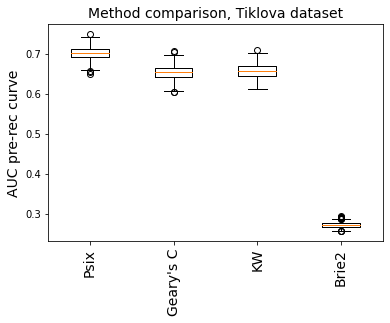

In [11]:


weyn_pos = weyn_fdr.index[(weyn_ds.max(axis=1) >= 0.2) & (weyn_fdr.min(axis=1) <= 0.01)]
weyn_neg = weyn_fdr.index[(weyn_ds.max(axis=1) < 0.2) | (weyn_fdr.min(axis=1) > 0.01)]

exons = tiklova_psix.index
exons_pos = weyn_pos & exons
exons_neg = weyn_neg & exons


kw_auc = []
psix_auc = []
gearyc_auc = []
briep_auc = []
brie_l_auc = []

for sample in tqdm(range(500)):
    pos_choice = np.random.choice(exons_pos, np.int(0.5*len(exons_pos)), replace=False)
    neg_choice = np.random.choice(exons_neg, np.int(0.5*len(exons_neg)), replace=False)
    
    y = [1]*len(pd.Index(pos_choice) & tiklova_gearyc.index) + [0]*len(pd.Index(neg_choice) & tiklova_gearyc.index)
    c_y = list(tiklova_gearyc.loc[pd.Index(pos_choice) & tiklova_gearyc.index].C_score) + list(tiklova_gearyc.loc[pd.Index(neg_choice) & tiklova_gearyc.index].C_score)
    pre, rec, thres = precision_recall_curve(y, c_y)
    gearyc_auc.append(auc(rec, pre))

    y = [1]*len(pos_choice) + [0]*len(neg_choice)
    psix_y = list(tiklova_psix.loc[pos_choice].psix_score) + list(tiklova_psix.loc[neg_choice].psix_score)
    pre, rec, thres = precision_recall_curve(y, psix_y)
    psix_auc.append(auc(rec, pre))
    

    kw_y = list(tiklova_kw.loc[pos_choice].KW_score) + list(tiklova_kw.loc[neg_choice].KW_score)
    pre, rec, thres = precision_recall_curve(y, kw_y)
    kw_auc.append(auc(rec, pre))
    

    r_y = list(tiklova_ovo.loc[[x for x in pos_choice if x in tiklova_ovo.index]]) + list(tiklova_ovo.loc[[x for x in neg_choice if x in tiklova_ovo.index]])
    pre, rec, thres = precision_recall_curve([1]*len([x for x in pos_choice if x in tiklova_ovo.index]) + [0]*len([x for x in neg_choice if x in tiklova_ovo.index]), r_y)
    brie_l_auc.append(auc(rec, pre))
    #####

tiklova_boxplots = [ psix_auc, gearyc_auc, kw_auc, brie_l_auc]

# kw_auc = []
# psix_auc = []
# gearyc_auc = []
# briep_auc = []
# brie_l_auc = []

bp = plt.boxplot(tiklova_boxplots)


plt.xticks(np.arange(1, 5), 
           ['Psix', "Geary's C", 'KW', 'Brie2'], fontsize=14, rotation=90)

plt.ylabel('AUC pre-rec curve', fontsize=14)
# plt.xlabel('Method', fontsize=14)
plt.title('Method comparison, Tiklova dataset', fontsize=14)
